# Clustering

In [10]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
from scipy.cluster.vq import kmeans, vq


In [1]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

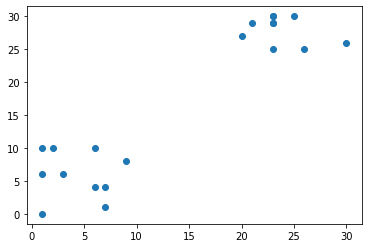

In [2]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

In [4]:
df = pd.DataFrame({'x_coordinates': x,
                  'y_coordinates': y})

In [5]:
Z = linkage(df,'ward') #based on sum of squares ward method
df['cluster_labels'] = fcluster(Z,3, criterion = 'maxclust')

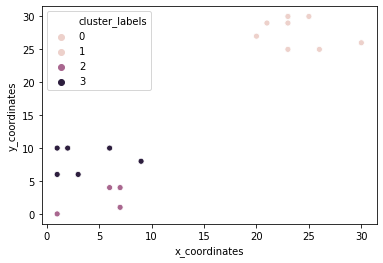

In [7]:
sns.scatterplot(x='x_coordinates', y = 'y_coordinates', hue = 'cluster_labels', data = df)
plt.show()

In [16]:
import random
random.seed((1000,2000))

In [ ]:
# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

# Cluster preperation (scaling data with whiten)

In [18]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


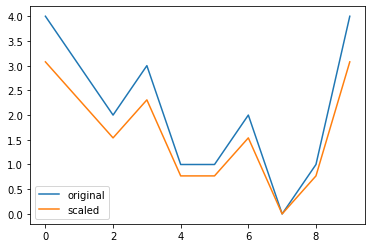

In [19]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

# Normalization of small numbers

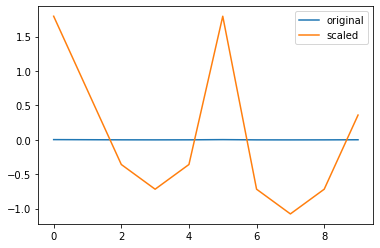

In [20]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

# Hierarchial Clustering

In [31]:
df = pd.read_csv("cluster1df.csv")
print(df.head())


   x_coordinate  y_coordinate  x_scaled  y_scaled
0            17             4  0.509349  0.090010
1            20             6  0.599234  0.135015
2            35             0  1.048660  0.000000
3            14             0  0.419464  0.000000
4            37             4  1.108583  0.090010


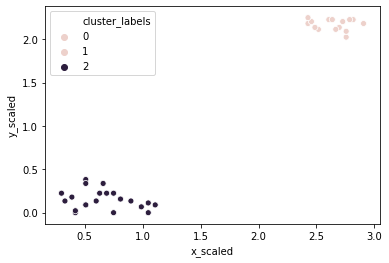

In [32]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(df[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df)
plt.show()

# Hierarcial cluster single method

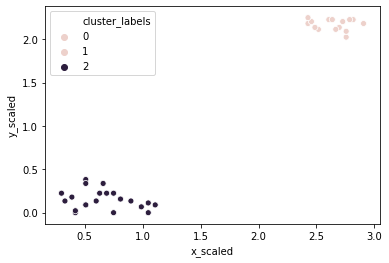

In [35]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(df[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df)
plt.show()

# Hierarchial clustering complete method

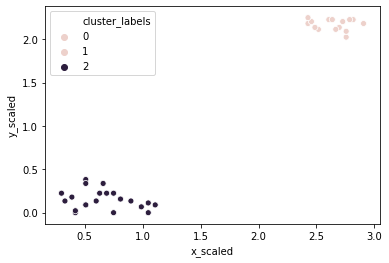

In [36]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(df[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = df)
plt.show()

# Visualizing Clusters

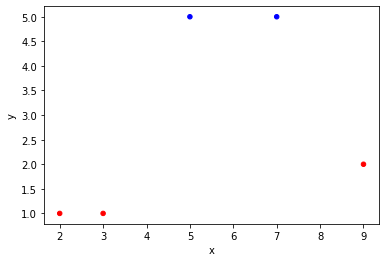

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
df2 = pd.DataFrame({'x': [2,3,5,7,9],
                   'y': [1,1,5,5,2],
                   'labels': ['A','A','B','B','A']})
colors = {'A':'red', 'B':'blue'}

df2.plot.scatter(x='x',
                y='y',
                c=df2['labels'].apply(lambda x: colors[x]))
plt.show()

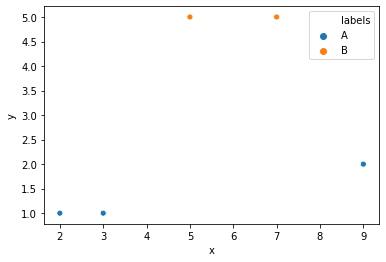

In [41]:
# PERFER SEABORN
sns.scatterplot(x='x',
                y='y',
                hue= 'labels',
                data = df2)
plt.show()

# Visualizing how to Decide number of  Clusters
# Dendrogram

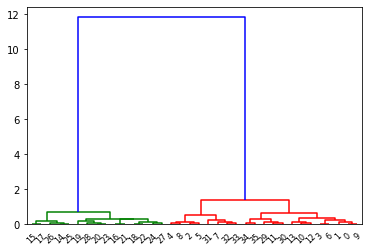

In [43]:
from scipy.cluster.hierarchy import dendrogram

distancematrix = linkage(df[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')
dn = dendrogram(distancematrix)
plt.show()